### Dawid Weiss

### 406410

### Zadanie 2c

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time

data = pd.read_csv('us_births_69_88.csv')
print("liczba dni ogółem:")
print(data.shape)

print("\n5 poczatkowych: ")
print(data.head(5))

liczba dni ogółem:
(372, 3)

5 poczatkowych: 
   month  day  births
0      1    1  160369
1      1    2  169896
2      1    3  180036
3      1    4  182854
4      1    5  184145


In [2]:
# Usuwanie nieprawidłowych rekordow tj 30 luty,31 kwiecień itd...
months_len = [31,29,31,30,31,30,31,31,30,31,30,31]

for i in data.index:
    if data.at[i,'day'] > months_len[data.at[i,'month']-1]:
        data = data.drop([i])

data = data.reset_index(drop=True)

In [3]:
total_births = sum(data.births)
df = data
df["probability"] = df.births/total_births #prawdopodobiensto urodzenia w konkretnym dniu
df["bottom"] = 0.0
df["top"] = 0.0
prefix_sum = 0.0; #suma prawdopodobienst do konkretnego dnia

for i in df.index:
    prefix_sum += df.at[i,'probability']
    df.at[i, 'top'] = prefix_sum
    df.at[i, 'bottom'] = prefix_sum - df.at[i,'probability']

# Rozwiazanie szybkie - zadanie 2c:

In [4]:
num_of_days = 366
V = 1 / num_of_days #pojemnosc kubełka

days = np.array([i for i in range(0,num_of_days)])
alias = np.array([-1]*num_of_days)    #dzien 'dorzucony' do konkretngo kubelka
prob = np.array(df["probability"])  #prawdopodobiensto wypadniecia dnia


In [5]:
def swap_buckets(a,b):
    days[a], days[b] = days[b], days[a]
    alias[a], alias[b] = alias[b], alias[a]
    prob[a], prob[b] = prob[b], prob[a]

#fill_buckets
filled_border = 0   #na lewo są już wypełnione
overflow_i = -1     #indeks > V
lack_i = -1         #indeks < V

while(filled_border < num_of_days):
    #szukanie pierwszego lack
    if prob[filled_border] == V:
        filled_border+=1
            
    for i in range(filled_border,num_of_days):
        if prob[i] < V:
            lack_i = i
            break

    #szukanie pierwszego overflow
    for i in range(filled_border,num_of_days):
        if prob[i] > V:
            overflow_i = i
            break

    if lack_i != -1 and overflow_i != -1:
        alias[lack_i] = days[overflow_i]
        prob[overflow_i] -= (V - prob[lack_i])
        #ustawiam wypełniony na prawo od granicy i przesuwam granice (tj. niezmiennik)
        swap_buckets(filled_border,lack_i)

    filled_border+=1


# Pomiar czasu dla n = 100 000: (Z Wektoryzacja - poprawione)

In [6]:
#losowanie dni:
n = 100 * 1000
rand_buckets = np.random.randint(num_of_days, size = n*num_of_days) #wylosowane kubelki
probs = prob[rand_buckets] #prawdopodobienstwa wylosowanych kubelkow
rand_d =  days[rand_buckets]
rand_alias = alias[rand_buckets]
rand_parts = np.random.uniform(0.0,V,size = n*num_of_days)  #wylosowane czesci kubelkow

rand_days = np.where(rand_parts > probs,rand_alias,rand_d) #wylosowane dni


In [7]:
last_i = 0

In [8]:
def sample(_):
    global last_i
    occ_days = set()
    days_until_occ = 1
    while(True):
        day = rand_days[last_i]
        
        if day in occ_days:
            break;

        last_i+=1
        days_until_occ+=1

        occ_days.add(day)
        
    return days_until_occ;
vsample = np.vectorize(sample)

In [9]:
%%time
last_i= 0 
n = 100 * 1000
repeating = [sample(0) for i in range (n)]

CPU times: user 924 ms, sys: 284 µs, total: 925 ms
Wall time: 924 ms


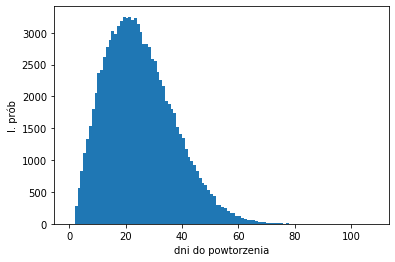

In [10]:
n_bins = max(repeating) + 10
histogram = plt.hist(repeating,bins = list(range(n_bins)))
plt.xlabel('dni do powtorzenia')
plt.ylabel('l. prób')
plt.show()